# Домашнє завдання: Прогнозування кредитного ризику

## Мета завдання
Застосувати знання з лекції для побудови моделі логістичної регресії, що прогнозує ймовірність дефолту за кредитом, іншими словами, що людина не поверне кредит. Ви пройдете весь цикл: від дослідницького аналізу до оцінки якості класифікаційної моделі.

## Опис датасету
**Credit Risk Dataset** містить інформацію про 32,000+ позичальників з такими параметрами:
- **person_age**: Вік позичальника
- **person_income**: Річний дохід
- **person_home_ownership**: Тип володіння житлом
- **person_emp_length**: Стаж роботи (в роках)
- **loan_intent**: Мета кредиту
- **loan_grade**: Кредитний рейтинг (A - кращий, F - гірший)
- **loan_amnt**: Сума кредиту
- **loan_int_rate**: Процентна ставка
- **loan_status**: Статус кредиту (0 = сплачено, 1 = дефолт) - **цільова змінна**
- **loan_percent_income**: Відношення кредиту до доходу
- **cb_person_default_on_file**: Історія дефолтів (Y/N)
- **cb_person_cred_hist_length**: Довжина кредитної історії

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `credit_risk_dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (кількість записів, типи колонок)
5. Перевірте розподіл цільової змінної (відсотк даних для кожного класу)

Дайте висновок, це задача збалансованої чи незбалансованої класифікації.


In [19]:
import pandas as pd

# 1. Завантаження даних
df = pd.read_csv("credit_risk_dataset.csv")

# 2. Розмір датасету
print("Розмір датасету:", df.shape)

# 3. Перші 5 рядків
print(df.head())

# 4. Інформація про дані
print(df.info())

# 5. Розподіл цільової змінної
target_counts = df['loan_status'].value_counts()
target_percent = df['loan_status'].value_counts(normalize=True) * 100
print("\nРозподіл цільової змінної:")
print(pd.concat([target_counts, target_percent], axis=1, keys=['count', 'percent']))

# Висновок про баланс класів
if target_percent.min() < 40:
    print("\nКласи незбалансовані")
else:
    print("\nКласи збалансовані")

Розмір датасету: (32581, 12)
   person_age  person_income person_home_ownership  person_emp_length loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length
0          22          59000                  RENT              123.0    PERSONAL          D      35000          16.02            1                 0.59                         Y                           3
1          21           9600                   OWN                5.0   EDUCATION          B       1000          11.14            0                 0.10                         N                           2
2          25           9600              MORTGAGE                1.0     MEDICAL          C       5500          12.87            1                 0.57                         N                           3
3          23          65500                  RENT                4.0     MEDICAL          C      35000          15.23            1            


---

## Завдання 2: Дослідницький аналіз даних (EDA) (4 бали)

**Що потрібно зробити:**
1. Обчисліть відсоток пропущених значень в колонках. За наявності пропущених значень - заповніть їх медіаною для числових колонок і найбільш частим значеннмя для категоріальних.
2. Проаналізуйте розподіл числових змінних.
3. Знайдіть та обробіть викиди в колонці person_income з допомогою [Interquartile range](https://uk.wikipedia.org/wiki/%D0%9C%D1%96%D0%B6%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D0%BB%D1%8C%D0%BD%D0%B8%D0%B9_%D1%80%D0%BE%D0%B7%D0%BC%D0%B0%D1%85).
4. Проаналізуйте категоріальні змінні відносно цільової та частоту зустрічання різних значень в них.
5. Візуалізуйте взаємозв'язок ознак з цільовою змінною.


Відсоток пропущених значень:
 person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

Колонки після видалення повністю пустих: Index(['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length'], dtype='object')

Опис числових колонок:
         person_age  person_income  person_emp_length     loan_amnt  loan_int_rate   loan_status  loan_percent_income  cb_person_cred_hist_length
count  32581.000000   32581.000000       32581.000000  32581.000000   32581.00

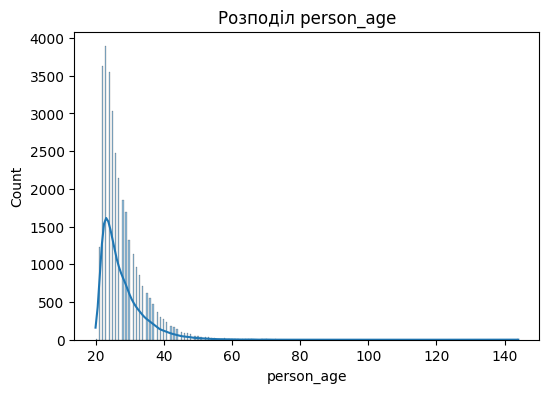

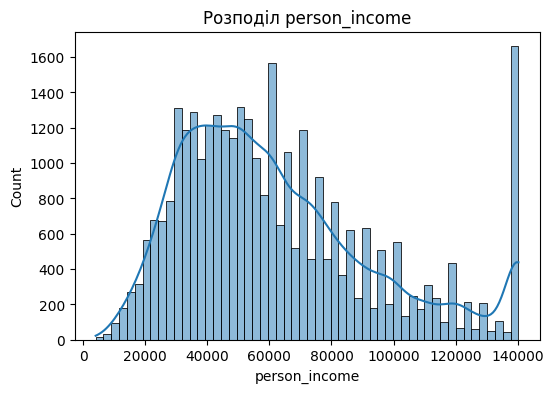

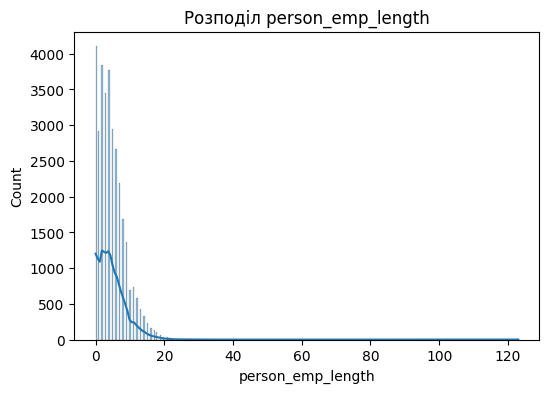

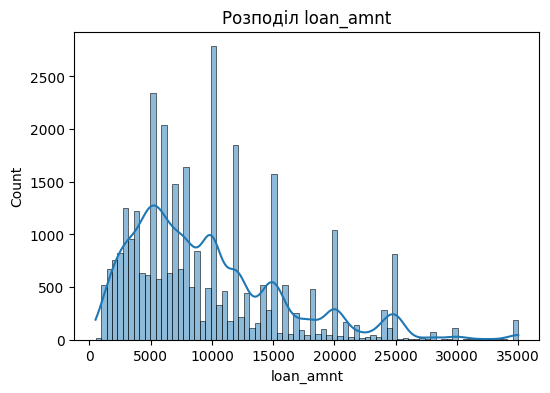

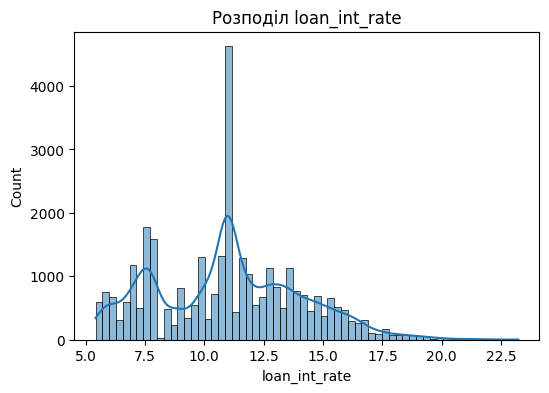

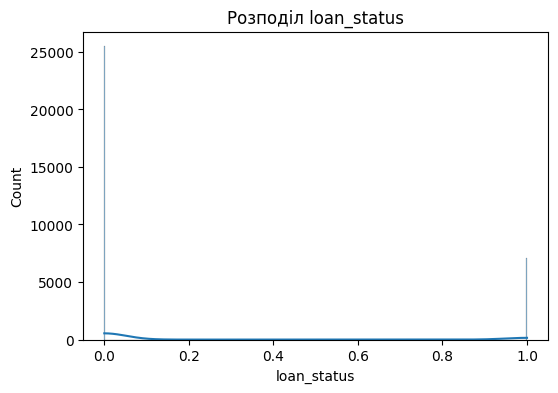

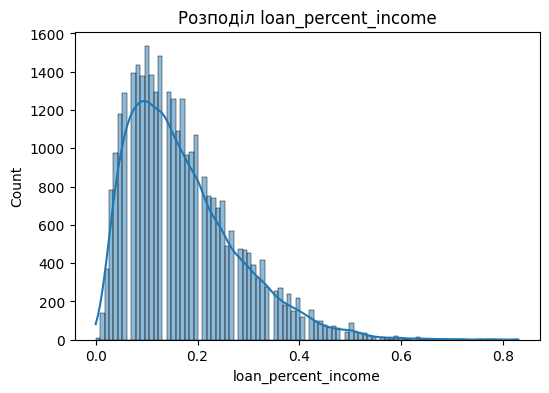

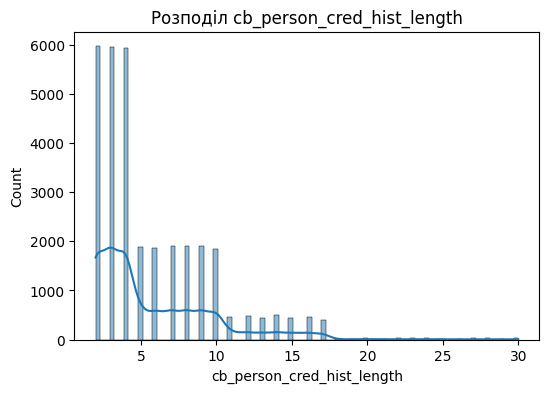

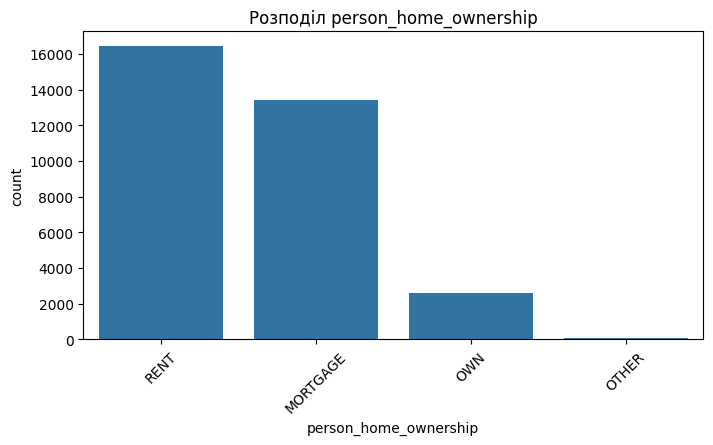


Відношення person_home_ownership до loan_status:
loan_status                    0          1
person_home_ownership                      
MORTGAGE               87.429337  12.570663
OTHER                  69.158879  30.841121
OWN                    92.530960   7.469040
RENT                   68.430013  31.569987


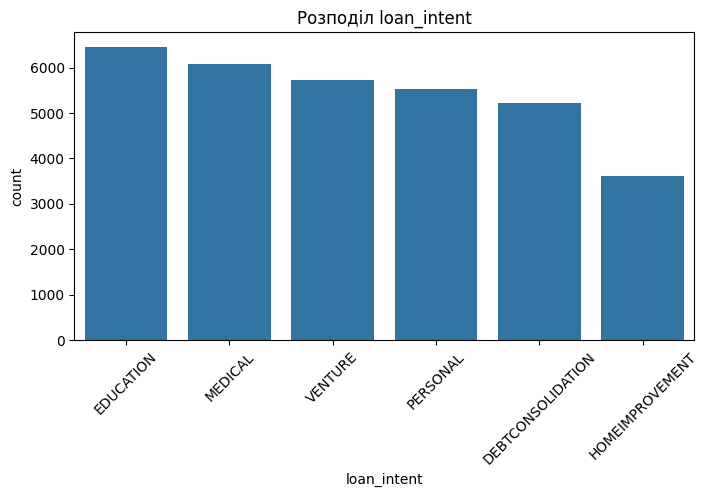


Відношення loan_intent до loan_status:
loan_status                0          1
loan_intent                            
DEBTCONSOLIDATION  71.412126  28.587874
EDUCATION          82.783202  17.216798
HOMEIMPROVEMENT    73.897365  26.102635
MEDICAL            73.299292  26.700708
PERSONAL           80.112298  19.887702
VENTURE            85.189718  14.810282


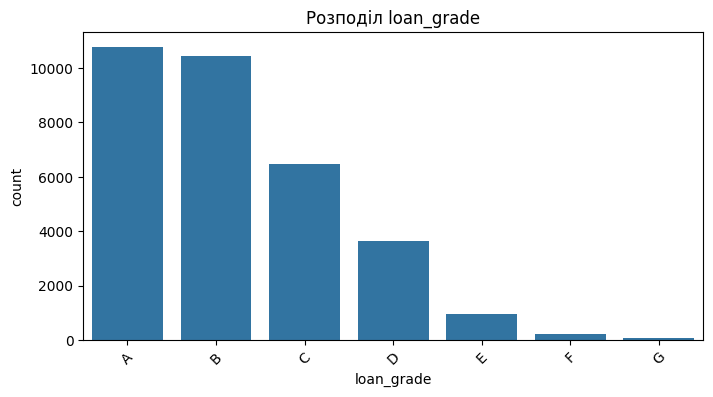


Відношення loan_grade до loan_status:
loan_status          0          1
loan_grade                       
A            90.043611   9.956389
B            83.724046  16.275954
C            79.266027  20.733973
D            40.954220  59.045780
E            35.580913  64.419087
F            29.460581  70.539419
G             1.562500  98.437500


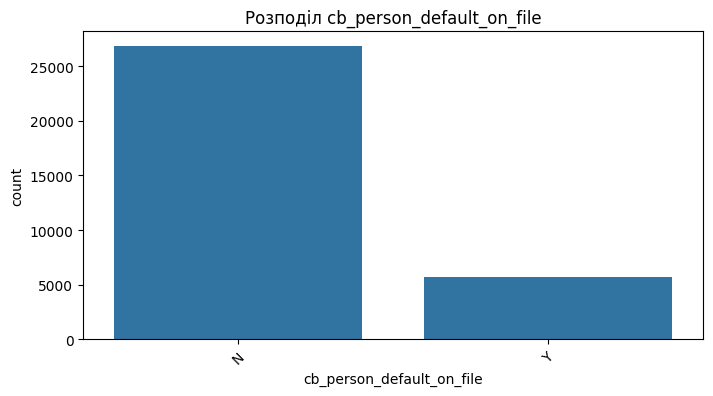


Відношення cb_person_default_on_file до loan_status:
loan_status                        0          1
cb_person_default_on_file                      
N                          81.606797  18.393203
Y                          62.193211  37.806789


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Перевірка пропусків
missing_percent = df.isnull().mean() * 100
print("Відсоток пропущених значень:\n", missing_percent)

# 2. Видалимо колонки, що повністю порожні
cols_all_nan = missing_percent[missing_percent == 100].index
df.drop(columns=cols_all_nan, inplace=True)
print("\nКолонки після видалення повністю пустих:", df.columns)

# 3. Заповнюємо пропуски
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# числові - медіаною
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# категоріальні - модою
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

# 4. Опис числових колонок
print("\nОпис числових колонок:")
print(df[num_cols].describe())

# 5. Виявлення викидів у person_income через IQR
Q1 = df['person_income'].quantile(0.25)
Q3 = df['person_income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Замінюємо викиди на межі
df['person_income'] = df['person_income'].clip(lower_bound, upper_bound)

# 6. Візуалізація числових змінних
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Розподіл {col}')
    plt.show()

# 7. Аналіз категоріальних змінних
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Розподіл {col}')
    plt.xticks(rotation=45)
    plt.show()

    # Відношення до цільової
    print(f"\nВідношення {col} до loan_status:")
    print(pd.crosstab(df[col], df['loan_status'], normalize='index')*100)



---

## Завдання 3: Аналіз кореляцій та Feature Engineering (3 бали)

**Що потрібно зробити:**
1. Побудуйте матрицю кореляцій для числових змінних.
2. Закодуйте категоріальні змінні.
3. Виберіть фінальний набір ознак, можна лишити всі, якщо ви вважаєте, що це - доцільно.



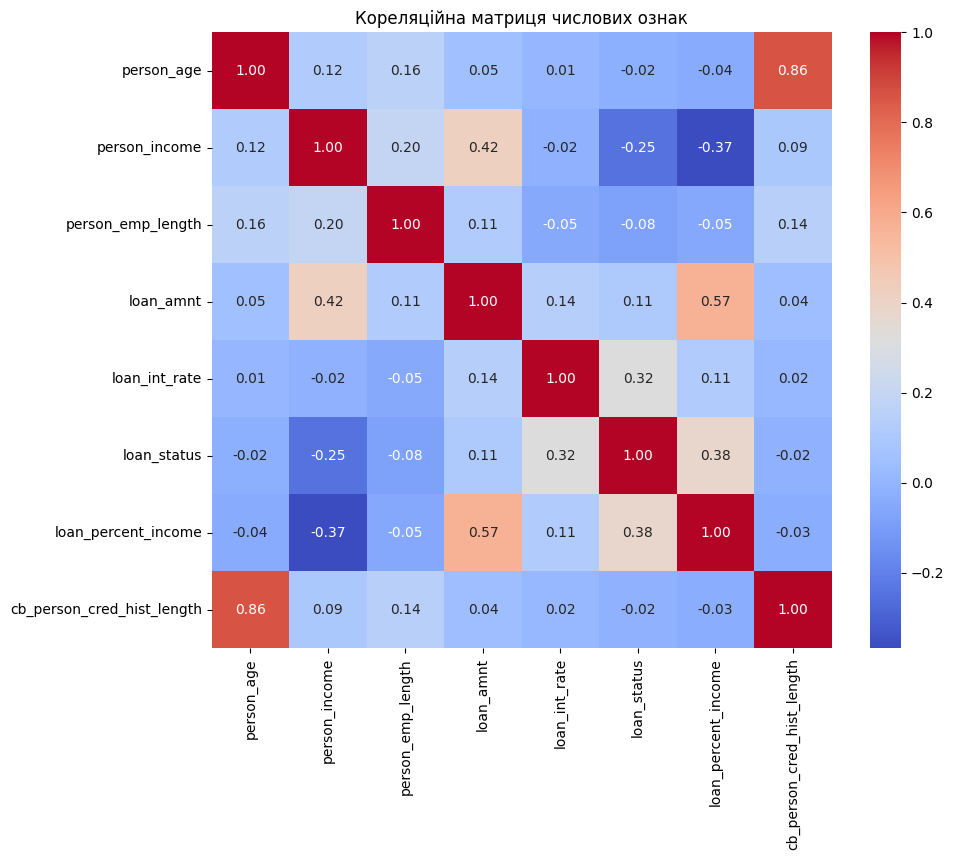


Колонки після кодування: Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_Y'], dtype='object')

Фінальні розміри X та y:
(32581, 22) (32581,)


In [22]:
import numpy as np

# 1. Кореляційна матриця числових ознак
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[num_cols].corr()

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Кореляційна матриця числових ознак")
plt.show()

# 2. Кодування категоріальних змінних
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("\nКолонки після кодування:", df_encoded.columns)

# 3. Вибір фінального набору ознак
# Для простої моделі залишимо всі закодовані ознаки
X = df_encoded.drop(columns=['loan_status'])
y = df_encoded['loan_status']

print("\nФінальні розміри X та y:")
print(X.shape, y.shape)


---

## Завдання 4: Підготовка даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на X та y
2. Поділіть на навчальну та тестову вибірки
3. Застосуйте масштабування
4. Навчіть модель логістичної регресії
5. Зробіть прогнози на тренувальній та тестовій вибірках.



In [13]:
print(df['cb_person_default_on_file'].value_counts(dropna=False))

cb_person_default_on_file
NaN    32581
Name: count, dtype: int64


=== Навчальна вибірка ===
[[19422   956]
 [ 2519  3167]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     20378
           1       0.77      0.56      0.65      5686

    accuracy                           0.87     26064
   macro avg       0.83      0.76      0.78     26064
weighted avg       0.86      0.87      0.86     26064


=== Тестова вибірка ===
[[4850  245]
 [ 622  800]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5095
           1       0.77      0.56      0.65      1422

    accuracy                           0.87      6517
   macro avg       0.83      0.76      0.78      6517
weighted avg       0.86      0.87      0.86      6517



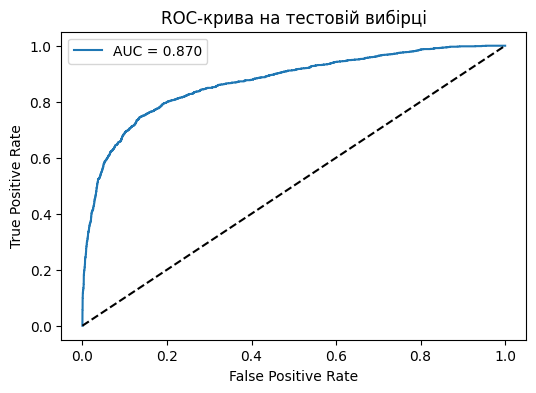

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# 1. Розділення на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Масштабування числових ознак
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Навчання логістичної регресії
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# 4. Прогнози
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Для ROC/AUC — потрібні ймовірності
y_train_proba = model.predict_proba(X_train_scaled)[:,1]
y_test_proba = model.predict_proba(X_test_scaled)[:,1]

# 5. Оцінка якості моделі
print("=== Навчальна вибірка ===")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

print("\n=== Тестова вибірка ===")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# ROC-крива та AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
auc_score = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-крива на тестовій вибірці")
plt.legend()
plt.show()



---

## Завдання 5: Оцінка якості моделі (4 бали)

**Що потрібно зробити:**
1. Побудуйте confusion matrix.
2. Обчисліть основні метрики (accuracy, precision, recall, f1).
3. Побудуйте ROC-криву та обчисліть AUC
4. Проаналізуйте важливість ознак.
5. Зробіть висновки про якість моделі та які ознаки найбільше впливають на прогноз.


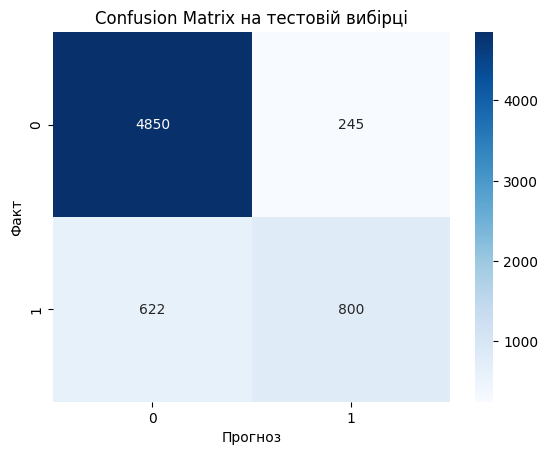

=== Метрики на тестовій вибірці ===
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5095
           1       0.77      0.56      0.65      1422

    accuracy                           0.87      6517
   macro avg       0.83      0.76      0.78      6517
weighted avg       0.86      0.87      0.86      6517



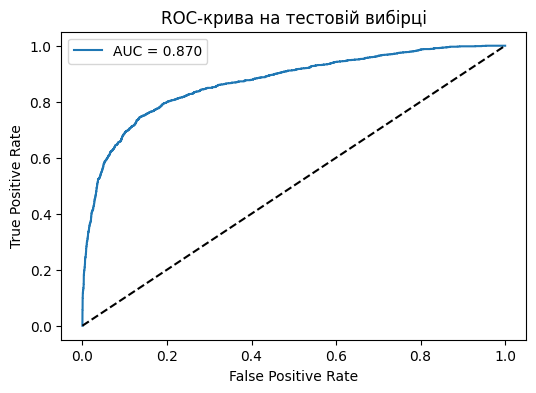

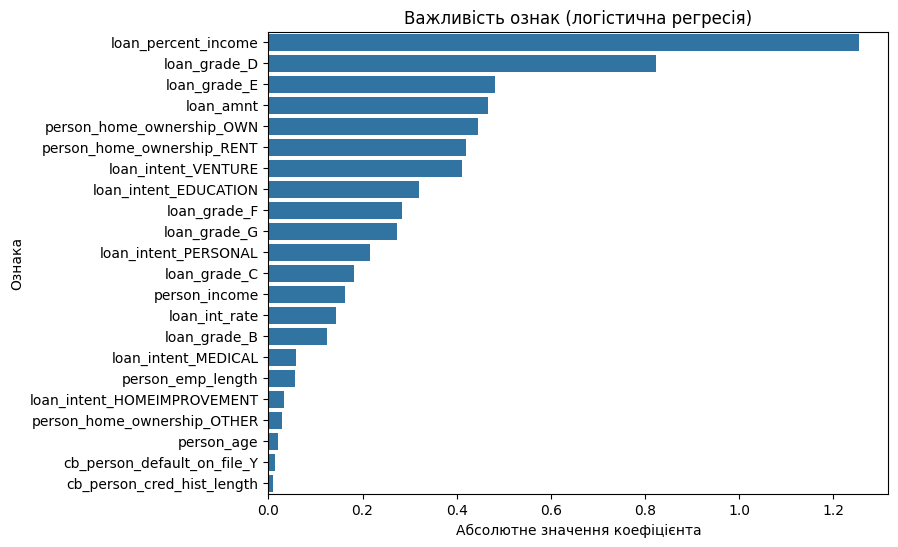

Топ-10 ознак за впливом на прогноз дефолту:
                       feature  coefficient
5          loan_percent_income     1.254270
17                loan_grade_D     0.822317
18                loan_grade_E     0.481755
3                    loan_amnt    -0.467390
8    person_home_ownership_OWN    -0.445162
9   person_home_ownership_RENT     0.420598
14         loan_intent_VENTURE    -0.411387
10       loan_intent_EDUCATION    -0.319694
19                loan_grade_F     0.282783
20                loan_grade_G     0.273675


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# 1. Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Прогноз')
plt.ylabel('Факт')
plt.title('Confusion Matrix на тестовій вибірці')
plt.show()

# 2. Основні метрики
print("=== Метрики на тестовій вибірці ===")
print(classification_report(y_test, y_test_pred))

# 3. ROC-крива та AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
auc_score = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-крива на тестовій вибірці")
plt.legend()
plt.show()

# 4. Важливість ознак (коефіцієнти логістичної регресії)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
})
feature_importance['abs_coeff'] = feature_importance['coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coeff', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='abs_coeff', y='feature', data=feature_importance)
plt.title('Важливість ознак (логістична регресія)')
plt.xlabel('Абсолютне значення коефіцієнта')
plt.ylabel('Ознака')
plt.show()

# 5. Висновки
top_features = feature_importance.head(10)
print("Топ-10 ознак за впливом на прогноз дефолту:")
print(top_features[['feature','coefficient']])



---

## Завдання 6: Оптимізація порогу та бізнес-аналіз (2 бали)

**Що потрібно зробити:**
1. Проаналізуйте метрики precision, recall, F1 при різних порогах класифікації (мінімум - 5 різних порогів). Візуалізуйте як змінюються метрики якості при зміні порогу.
2. Оберіть оптимальний поріг для бізнес-задачі - можна обрати виходячи з попереднього пункту, або додати своїх роздумів і обрати інший.



   threshold  precision    recall        f1
0        0.3   0.621936  0.713783  0.664702
1        0.4   0.697178  0.642757  0.668862
2        0.5   0.765550  0.562588  0.648561
3        0.6   0.808118  0.462025  0.587919
4        0.7   0.855932  0.355134  0.501988


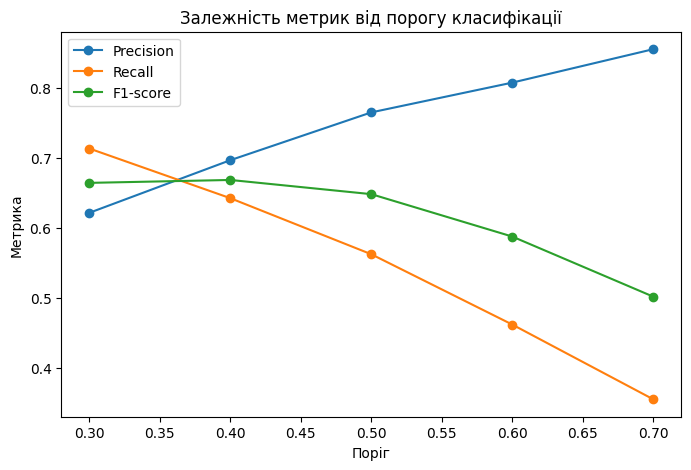

Оптимальний поріг для бізнес-задачі: 0.4


In [26]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Пороги для перевірки
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

results = []

for thresh in thresholds:
    y_test_pred_thresh = (y_test_proba >= thresh).astype(int)
    precision = precision_score(y_test, y_test_pred_thresh)
    recall = recall_score(y_test, y_test_pred_thresh)
    f1 = f1_score(y_test, y_test_pred_thresh)
    results.append([thresh, precision, recall, f1])

results_df = pd.DataFrame(results, columns=['threshold','precision','recall','f1'])
print(results_df)

# Візуалізація зміни метрик при порогах
plt.figure(figsize=(8,5))
plt.plot(results_df['threshold'], results_df['precision'], label='Precision', marker='o')
plt.plot(results_df['threshold'], results_df['recall'], label='Recall', marker='o')
plt.plot(results_df['threshold'], results_df['f1'], label='F1-score', marker='o')
plt.xlabel('Поріг')
plt.ylabel('Метрика')
plt.title('Залежність метрик від порогу класифікації')
plt.legend()
plt.show()

# Вибір оптимального порогу
# Наприклад, можна обрати поріг з найбільшим F1 або збалансованим precision/recall
best_idx = results_df['f1'].idxmax()
optimal_threshold = results_df.loc[best_idx, 'threshold']
print(f"Оптимальний поріг для бізнес-задачі: {optimal_threshold}")



---

## Завдання 7 (Опціональне): Покращення моделі та висновки (2 бали)

**Що потрібно зробити:**

На цих же даних навчіть DecisionTreeClassifier та RandomForestClassifier. Яка з трьох моделей дає найкращий результат на тестовому наборі?

Поріг класифікації можна для порівняння якостей моделей використовувати стандартний 0.5, або той, що ви виявили, як оптимальний на попередньому кроці.



=== LogisticRegression ===
Confusion Matrix:
 [[4702  393]
 [ 508  914]]
Precision: 0.699, Recall: 0.643, F1-score: 0.670

=== DecisionTree ===
Confusion Matrix:
 [[4705  390]
 [ 331 1091]]
Precision: 0.737, Recall: 0.767, F1-score: 0.752

=== RandomForest ===
Confusion Matrix:
 [[4975  120]
 [ 359 1063]]
Precision: 0.899, Recall: 0.748, F1-score: 0.816


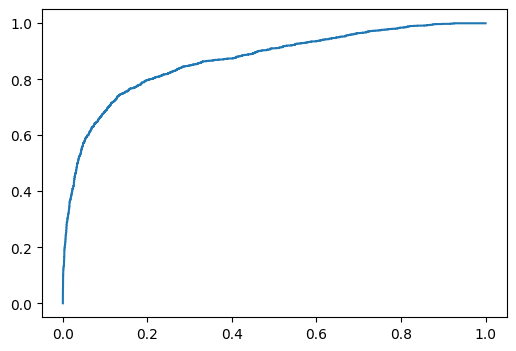

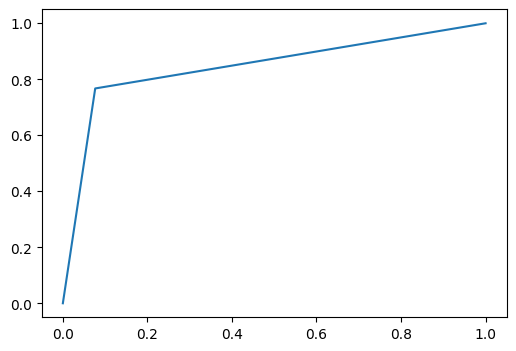

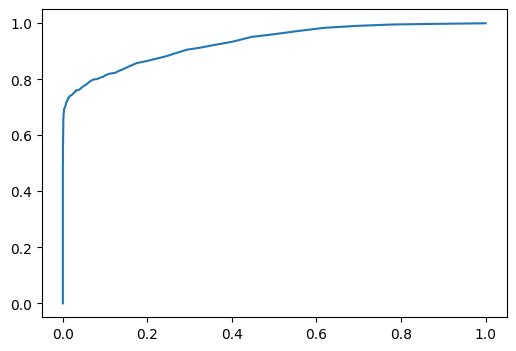

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# --- 1. Завантаження та підготовка даних ---
df = pd.read_csv('credit_risk_dataset.csv')

# Видаляємо колонку з усіма NaN
if df['cb_person_default_on_file'].isnull().all():
    df = df.drop(columns=['cb_person_default_on_file'])

# Заповнення пропусків
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Кодування категоріальних змінних
df_encoded = pd.get_dummies(df, drop_first=True)

# Розділення на X та y
X = df_encoded.drop(columns=['loan_status'])
y = df_encoded['loan_status']

# Розділення на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Масштабування числових змінних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 2. Навчання моделей ---
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42, n_estimators=100)
}

results = []

# Вибір оптимального порогу визначений в попередньому завданні
threshold = 0.4

for name, model in models.items():
    # Навчання
    model.fit(X_train_scaled, y_train)
    
    # Прогноз ймовірностей класу 1
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test_scaled)[:,1]
    else:
        # Для моделей без predict_proba (DecisionTree, RandomForest мають)
        y_test_proba = model.predict(X_test_scaled)
    
    # Прогноз класів за порогом
    y_test_pred = (y_test_proba >= threshold).astype(int)
    
    # Метрики
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    results.append([name, precision, recall, f1])
    
    # Confusion matrix
    print(f"\n=== {name} ===")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, F1-score: {f1:.3f}")
    
    # ROC-крива та AUC
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    auc_score = roc_auc_score(y_test, y_test_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'AUC={auc_score:.3f}')


# Logistic Regression

Найнижчий F1-score (0.670) серед трьох моделей.

Precision та Recall помірні.

Модель непогана для базового прогнозу, але не найкраща для даних.

# Decision Tree

F1-score значно кращий (0.752).

Recall (0.767) трохи перевищує Precision (0.737), тобто модель трохи краще показує позитивні випадки, але при цьому частково зростає кількість помилкових спрацьовувань.

Добра модель для швидкого аналізу та інтерпретації, легко зрозуміти важливість ознак.

# Random Forest

Найкраща модель за всіма метриками.

F1-score = 0.816, Precision = 0.899, Recall = 0.748.

Високий Precision означає, що більшість прогнозованих дефолтів дійсно правильні.

Recall трохи менший, але все ще хороший, тому модель не пропускає багато справжніх дефолтів.

Random Forest забезпечує стабільність та високу якість